In [10]:
import pygmsh
import matplotlib.pyplot as plt

In [5]:
with pygmsh.geo.Geometry() as geom:
    geom.add_polygon(
        [
            [0.0, 0.0],
            [1.0, -0.2],
            [1.1, 1.2],
            [0.1, 0.7],
        ],
        mesh_size=0.1,
    )
    mesh = geom.generate_mesh()

# mesh.points, mesh.cells, ...
# mesh.write("out.vtk")

In [65]:
# boundary refinement
import pygmsh

with pygmsh.geo.Geometry() as geom:
    poly = geom.add_polygon(
        [
            [0.0, 0.0],
            [2.0, 0.0],
            [3.0, 1.0],
            [1.0, 2.0],
            [0.0, 1.0],
        ],
        mesh_size=0.1,
    )

    field0 = geom.add_boundary_layer(
        edges_list=[poly.curves[0]],
        lcmin=0.05, # min cell size
        lcmax=0.2, # max cell size
        distmin=0.0, # min wall distance
        distmax=0.2, # max wall distance (distmax-distmin=thichness of boundary layer)
    )
    field1 = geom.add_boundary_layer(
        nodes_list=[poly.points[2]],
        lcmin=0.05,
        lcmax=0.2,
        distmin=0.1,
        distmax=0.4,
    )
    geom.set_background_mesh([field0, field1], operator="Min")

    mesh = geom.generate_mesh()

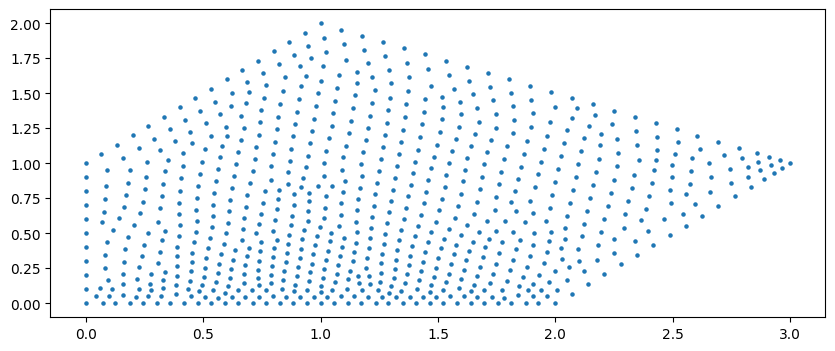

In [29]:
# Visualize
plt.figure(figsize=(10, 4))
plt.scatter(mesh.points[:, 0], mesh.points[:, 1], s=5)
# plt.axis("equal")
plt.show()

In [93]:
from shapely.geometry import Point, LineString, Polygon
import numpy as np
import torch



def ffsGeo(Lo, Ho):
    xMax = 1
    xMin = -2
    Wo = 0.1
    bPoints = [
        [xMin, 0.5], [-Lo, 0.5], [-Lo, 0.5 - Ho],
        [-Lo + Wo, 0.5 - Ho], [-Lo + Wo, 0.5], [0, 0.5],
        [0, 0], [xMax, 0], [xMax, -0.5], [xMin, -0.5] #,[xMin, 0.5]
    ]
    with pygmsh.geo.Geometry() as geom:
        poly = geom.add_polygon(
            bPoints,
            mesh_size=0.1,
        )

        fields = []
        for curve in poly.curves[0:5]:
            field = geom.add_boundary_layer(
                edges_list=[curve],
                lcmin=0.02, # min cell size
                lcmax=0.1, # max cell size
                distmin=0.0, # min wall distance
                distmax=0.05, # max wall distance (distmax-distmin=thichness of boundary layer)
                )
            fields.append(field)
            
        # field1 = geom.add_boundary_layer(
        #     nodes_list=[poly.points[2]],
        #     lcmin=0.05,
        #     lcmax=0.2,
        #     distmin=0.1,
        #     distmax=0.4,
        # )
        geom.set_background_mesh(fields, operator="Min")

        mesh = geom.generate_mesh()

    boundary = LineString(bPoints)
    return {'poly': poly, 'geo': geom, 'mesh': mesh}

In [94]:
ffsGeom = ffsGeo(Lo=1, Ho=0.4)
mesh = ffsGeom['mesh']
geo = ffsGeom['geo']
poly = ffsGeom['poly']

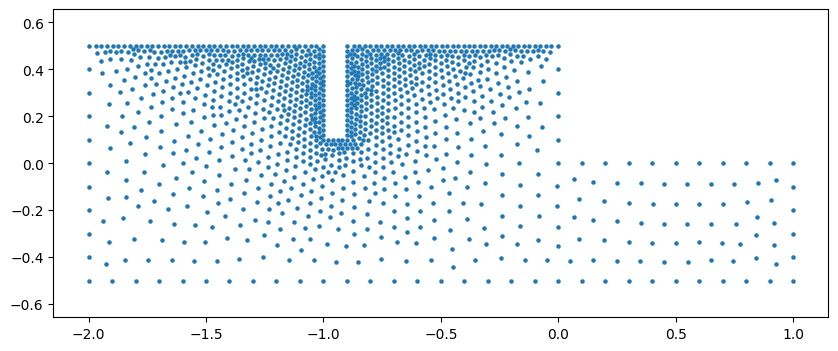

In [95]:

# Visualize
plt.figure(figsize=(10, 4))
plt.scatter(mesh.points[:, 0], mesh.points[:, 1], s=5)
plt.axis("equal")
plt.show()